In [1]:
import numpy as np
import pandas as pd

In [2]:
##

In [3]:
hd = pd.read_html('https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/data/heart-disease.csv')

In [4]:
data = hd[0].iloc[:,1:]

In [5]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
#Feature and Target label

In [8]:
featured_x = data.drop('target',axis=1)
target_y = data['target']

In [9]:
####################
#
# CONFUSION MATRIX
#
###################

In [10]:
# confusion matrix compares the actual label vs the predicted label

In [11]:
# help to find the area where model is confused or unable to give the exact prediction

In [14]:
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [15]:
##Train Test Split
np.random.seed(1)

x_train,x_test,y_train,y_test = train_test_split(featured_x,target_y,test_size=0.2)

clf = RandomForestClassifier()

clf.fit(x_train,y_train)

RandomForestClassifier()

In [16]:
# Accuracy/Score

clf.score(x_test,y_test)

0.7868852459016393

In [17]:
## Prediction

In [18]:
y_preds = clf.predict(x_test)

In [19]:
y_preds #Predicted label result

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0], dtype=int64)

In [21]:
np.array(y_test) #original label 

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1], dtype=int64)

In [22]:
##############################################
#CONFUSION MATRIX
#############################################

In [23]:
confusion_matrix(y_test,y_preds)

array([[22,  8],
       [ 5, 26]], dtype=int64)

In [24]:
#pnadas Crosstab for compare 

In [25]:
pd.crosstab(y_test,y_preds,rownames=['Actual Label'],colnames=['Predicted Label'])

Predicted Label,0,1
Actual Label,,
0,22,8
1,5,26


In [26]:
len(y_preds) == (22+8+5+26)

True

In [28]:
# first row  : 8 False positive as actual label is 0
# second row : 5 False negative as actual label is 1

In [29]:
# Better way to visualize confusion matrix (heatmap)

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5,palette='rainbow')

In [32]:
#plot

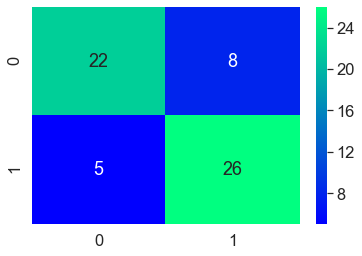

In [37]:
con_matrix = confusion_matrix(y_test,y_preds)

sns.heatmap(con_matrix,cmap='winter',annot=True)
plt.show()

In [38]:
## creatin a function for plot

In [45]:
def plot_confusion_matrix(conf_mat):
    fig,ax = plt.subplots(figsize=(4,4))
    ax = sns.heatmap(conf_mat,annot=True,cmap='summer')
    
    plt.title('Confusion Matrix Heat Map',fontsize=25)
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label');
    

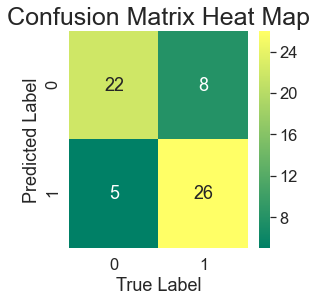

In [46]:
plot_confusion_matrix(con_matrix)